## Configurações Iniciais


Para tratamento, pré-processamento e treinamento do modelo preditivo, é necessário instalar e importar as seguintes bibliotecas inicialmente:

- Pandas: Usada para análise de dados tabulares, oferecendo estruturas flexíveis como o DataFrame.
- NumPy: Essencial para computação numérica, fornecendo suporte a arrays multidimensionais e funções matemáticas.
- Seaborn: Simplifica a criação de gráficos estatísticos atraentes e informativos.
- Matplotlib: Amplamente usado para criação de gráficos personalizados e visualizações de dados.
- Scikit-Learn: Uma biblioteca de aprendizado de máquina com ferramentas para treinamento de modelos e avaliação de desempenho.
- Imbalanced-Learn (imblearn): Lida com conjuntos de dados desequilibrados, oferecendo técnicas de reamostragem.
- XGBoost é uma biblioteca de gradient boosting de alto desempenho usada para classificação e regressão em aprendizado de máquina.

### Instalação e Importação

In [1]:
# ! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


### Ler o Arquivo do Dataset

In [3]:
pd.set_option('display.max_columns', None)

clientes_df = pd.read_csv('./outros/dataset/base_clientes.csv')
churn_df = pd.read_csv('./outros/dataset/base_hist_churn.csv')
precos_df = pd.read_csv('./outros/dataset/base_precos.csv')

display(clientes_df)

id                      activity_new  \
0      ed18c9981ce183ef347246cdcc55f743  bwpaswkpcilmlklklcapcwwumwaodaoo   
1      9c341e73685fcff6e3527ebd51da3fe5                               NaN   
2      97dd64b33716aadc4e22c4ab85d1c7a4                               NaN   
3      cf81de72ff7997ed10729751059cf7a3  apdekpcbwosbxepsfxclislboipuxpop   
4      c7c8ee9daf2a864d159d45a2373ada72                               NaN   
...                                 ...                               ...   
20115  18463073fb097fc0ac5d3e040f356987                               NaN   
20116  d0a6f71671571ed83b2645d23af6de00                               NaN   
20117  10e6828ddd62cbcf687cb74928c4c2d2                               NaN   
20118  1cf20fd6206d7678d5bcafd28c53b4db                               NaN   
20119  563dde550fd624d7352f3de77c0cdfcd                               NaN   

       campaign_disc_ele                     channel_sales  cons_12m  \
0                    NaN  foosdfpfkusacimwkcsosbicdxkicaua     42132   
1                    NaN  foosdfpfkusacimwkcsosbicdxkicaua      3537   
2                    NaN  foosdfpfkusacimwkcsosbicdxkicaua      6543   
3                    NaN  foosdfpfkusacimwkcsosbicdxkicaua    186838   
4                    NaN  usilxuppasemubllopkaafesmlibmsdf     19051   
...                  ...                               ...       ...   
20115                NaN  foosdfpfkusacimwkcsosbicdxkicaua     32270   
20116                NaN  foosdfpfkusacimwkcsosbicdxkicaua      7223   
20117                NaN  foosdfpfkusacimwkcsosbicdxkicaua      1844   
20118                NaN  foosdfpfkusacimwkcsosbicdxkicaua       131   
20119                NaN                               NaN      8730   

       cons_gas_12m  cons_last_month  date_activ    date_end date_first_activ  \
0                 0             3215  06/09/2017  06/09/2022              NaN   
1                 0              563  13/12/2016  31/12/2022              NaN   
2                 0              399  04/09/2016  04/09/2022              NaN   
3                 0            12091  03/01/2017  03/01/2023              NaN   
4                 0                0  07/10/2017  07/10/2022              NaN   
...             ...              ...         ...         ...              ...   
20115         47940                0  24/05/2018  08/05/2022              NaN   
20116             0              181  27/08/2018  27/08/2022       27/08/2018   
20117             0              179  08/02/2018  07/02/2022              NaN   
20118             0                0  30/08/2018  30/08/2022              NaN   
20119             0                0  18/12/2015  17/12/2022              NaN   

      date_modif_prod date_renewal  forecast_base_bill_ele  \
0          27/08/2021   07/09/2021                     NaN   
1          13/12/2016   01/01/2022                     NaN   
2          27/08/2021   05/09/2021                     NaN   
3          03/01/2017   04/01/2022                     NaN   
4          27/08/2021   09/10/2021                     NaN   
...               ...          ...                     ...   
20115      08/05/2021   26/05/2020                     NaN   
20116      27/08/2018   28/08/2021                   68.64   
20117      08/02/2018   09/02/2021                     NaN   
20118      30/08/2018   31/08/2021                     NaN   
20119      18/12/2015   21/12/2021                     NaN   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons  \
0                          NaN                NaN            NaN   
1                          NaN                NaN            NaN   
2                          NaN                NaN            NaN   
3                          NaN                NaN            NaN   
4                          NaN                NaN            NaN   
...                        ...                ...            ...   
20115                      NaN                NaN    

## Pré-processamento de Dados

A preparação de dados desempenha um papel fundamental na qualidade dos resultados de análises e modelagens de dados. Ela começa com a seleção cuidadosa dos dados a serem utilizados, pois dados de entrada inadequados podem levar a resultados imprecisos.

Durante esse processo, foi efetuada a limpeza de dados nulos, que não podem ser utilizadas para treinamento do modelo preditivo. Além disso, foram removidas colunas e linhas que não agregam valor, por conterem muitos dados faltantes ou duplicados. No caso de poucos dados nulos, foi utilizado o método de imputação, que consiste em substituir os valores faltantes por outros valores. Nesse caso, baseado na Regressão Linear.

Para dados ruidosos, como datas inexistentes, caracteres para representar colunas binárias e valores negativos, foram utilizadas técnicas de limpeza de dados, como a remoção de caracteres especiais e conversão de tipos de dados. Por último, foi efetuada a normalização dos dados, que consiste em transformar os dados em uma escala comum, para que o modelo não dê mais importância a uma variável do que a outra.

Para mais informações, acesse a <a href="https://github.com/2023M3T7-Inteli/grupo4/blob/main/documentos/documentacao.md#42-compreensão-dos-dados">Seção 4.2: Compreensão dos Dados</a> da documentação do projeto.


### Limpeza de Dados Nulos

In [4]:
# Dropar linhas com valores nulos e coluna 'price_date'
precos_no_nulls = precos_df.dropna()
precos_no_nulls = precos_no_nulls.drop('price_date', axis=1)

# Calcular a média das colunas de preços agrupadas somente por 'id'
precos_no_nulls = precos_no_nulls.groupby('id').mean().reset_index()
precos_no_nulls.info()

# Exibir o DataFrame resultante
no_nulls_df = pd.merge(clientes_df, precos_no_nulls, on='id')
no_nulls_df = pd.merge(no_nulls_df, churn_df, on='id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20118 entries, 0 to 20117
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20118 non-null  object 
 1   price_p1_var  20118 non-null  float64
 2   price_p2_var  20118 non-null  float64
 3   price_p3_var  20118 non-null  float64
 4   price_p1_fix  20118 non-null  float64
 5   price_p2_fix  20118 non-null  float64
 6   price_p3_fix  20118 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


In [5]:
# Dropar linhas com valores ruidosos dentro das colunas com poucos campos nulos
drop_rows = ['date_end', 'date_modif_prod', 'date_renewal', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'origin_up', 'pow_max']
no_nulls_df = no_nulls_df.dropna(subset=drop_rows)

In [6]:
# Dropar colunas com muitos valores nulos
colunas_drop = ['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_cons']
no_nulls_df = no_nulls_df.drop(colunas_drop, axis=1)

### Preenchimento com Regressão Linear

In [7]:
linear_regression_df = no_nulls_df.copy()

In [8]:
# Fazer uma regressão linear das seguintes colunas através de imp_cons
columns_forecast = ['forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m']

for i in range(len(columns_forecast)):
    # Filtrar os dados para remover linhas com valores nulos
    data = linear_regression_df.dropna(subset=columns_forecast[i:i+1])

    # Separar as variáveis independentes (X) e dependente (y)
    X = data[['imp_cons']]
    y = data[[columns_forecast[i]]]

    # Inicializar o modelo de regressão linear e treinar o modelo
    model = LinearRegression()
    model.fit(X, y)

    # Filtrar os dados para prever (manter) apenas linhas com valores nulos
    data_with_nulls = linear_regression_df[linear_regression_df[columns_forecast[i]].isnull()]

    # Verificar se há linhas para prever
    if not data_with_nulls.empty:
        # Prever os valores nulos nas colunas e preencher com as previsões
        predicted_values = model.predict(data_with_nulls[['imp_cons']])
        linear_regression_df.loc[linear_regression_df[columns_forecast[i]].isnull(), columns_forecast[i]] = predicted_values

display(linear_regression_df)

id                     channel_sales  \
0      48ada52261e7cf58715202705a0451c9  lmkebamcaaclubfxadlmueccxoimlema   
2      d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
5      568bb38a1afd7c0fc49c77b3789b59a3  foosdfpfkusacimwkcsosbicdxkicaua   
...                                 ...                               ...   
16089  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
16090  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
16091  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
16092  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
16093  563dde550fd624d7352f3de77c0cdfcd                               NaN   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0        309275             0            10025  07/11/2018  06/11/2022   
2          4660             0                0  21/08/2015  30/08/2022   
3           544             0                0  16/04/2016  16/04/2022   
4          1584             0                0  30/03/2016  30/03/2022   
5        121335             0            12400  08/04/2016  08/04/2022   
...         ...           ...              ...         ...         ...   
16089     32270         47940                0  24/05/2018  08/05/2022   
16090      7223             0              181  27/08/2018  27/08/2022   
16091      1844             0              179  08/02/2018  07/02/2022   
16092       131             0                0  30/08/2018  30/08/2022   
16093      8730             0                0  18/12/2015  17/12/2022   

      date_modif_prod date_renewal  forecast_base_bill_ele  \
0          07/11/2018   09/11/2021             1198.504398   
2          21/08/2015   31/08/2021               51.230532   
3          16/04/2016   17/04/2021               51.230532   
4          30/03/2016   31/03/2021               51.230532   
5          08/04/2016   12/04/2021             1399.830000   
...               ...          ...                     ...   
16089      08/05/2021   26/05/2020               51.230532   
16090      27/08/2018   28/08/2021               68.640000   
16091      08/02/2018   09/02/2021               76.126292   
16092      30/08/2018   31/08/2021               51.230532   
16093      18/12/2015   21/12/2021               51.230532   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons_12m  \
0                  1198.504398        9414.151695           26520.30   
2                    51.230532        2010.401038             189.95   
3                    51.230532        2010.401038              47.96   
4                    51.230532        2010.401038             240.04   
5                  1399.830000       14559.740000           10865.02   
...                        ...                ...                ...   
16089                51.230532        2010.401038            4648.01   
16090                68.640000        1254.650000             631.69   
16091                76.126292        2171.061893             190.39   
16092                51.230532        2010.401038              19.34   
16093                51.230532        2010.401038             762.41   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   10025                       0.0                   359.29   
2                       0                       0.0                    16.27   
3                       0                       0.0                    38.72   
4                       0                       0.0                    19.83   
5                   12400                       0.0                   170.74   
...                   ...                       ...                      ...   
16089                   0                       0.0  

### Correção de Dados Ruidosos

In [9]:
processing_df = linear_regression_df.copy()

In [10]:
# Substituição de datas impossíveis por datas viáveis (anos bissextos)

anos_nao_bissextos = [2017, 2018, 2019, 2021, 2022] # Lista com anos não bissextos contidos na base de dados
lista_colunas = ['date_activ', 'date_end', 'date_modif_prod'] # Lista com colunas que contém datas

# Loop que itera entre cada data de cada ano não bissexto em cada coluna da lista e substitui a data impossível
for coluna in lista_colunas:
    for ano in anos_nao_bissextos:
        processing_df.loc[processing_df[coluna] == '29/02/' + str(ano), coluna] = '28/02/' + str(ano)

In [11]:
# Transformar os valores 't' e 'f' da coluna 'has_gas' em 1 e 0, respectivamente
processing_df['has_gas'] = processing_df['has_gas'].map({'t': 1, 'f': 0})

# Dropar colunas com valores negativos
colunas = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']
processing_df = processing_df[~(processing_df[colunas] < 0).any(axis=1)]

### Normalização e Tratamento de Colunas Categóricas

In [12]:
normalized_df = processing_df.copy()


In [13]:
numeric_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']
display(normalized_df)
scaler = RobustScaler()
normalized_df[numeric_cols] = scaler.fit_transform(normalized_df[numeric_cols])
display(normalized_df)

id                     channel_sales  \
2      d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
6      149d57cf92fc41cf94415803a877cb4b                               NaN   
7      1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
...                                 ...                               ...   
16089  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
16090  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
16091  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
16092  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
16093  563dde550fd624d7352f3de77c0cdfcd                               NaN   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
2          4660             0                0  21/08/2015  30/08/2022   
3           544             0                0  16/04/2016  16/04/2022   
4          1584             0                0  30/03/2016  30/03/2022   
6          4425             0              526  13/01/2016  07/03/2022   
7          8302             0             1998  09/12/2017  09/12/2022   
...         ...           ...              ...         ...         ...   
16089     32270         47940                0  24/05/2018  08/05/2022   
16090      7223             0              181  27/08/2018  27/08/2022   
16091      1844             0              179  08/02/2018  07/02/2022   
16092       131             0                0  30/08/2018  30/08/2022   
16093      8730             0                0  18/12/2015  17/12/2022   

      date_modif_prod date_renewal  forecast_base_bill_ele  \
2          21/08/2015   31/08/2021               51.230532   
3          16/04/2016   17/04/2021               51.230532   
4          30/03/2016   31/03/2021               51.230532   
6          13/01/2016   09/03/2021              123.393755   
7          01/11/2021   10/12/2021              290.100000   
...               ...          ...                     ...   
16089      08/05/2021   26/05/2020               51.230532   
16090      27/08/2018   28/08/2021               68.640000   
16091      08/02/2018   09/02/2021               76.126292   
16092      30/08/2018   31/08/2021               51.230532   
16093      18/12/2015   21/12/2021               51.230532   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons_12m  \
2                    51.230532        2010.401038             189.95   
3                    51.230532        2010.401038              47.96   
4                    51.230532        2010.401038             240.04   
6                   123.393755        2476.094996             445.75   
7                   290.100000        1412.540000             796.94   
...                        ...                ...                ...   
16089                51.230532        2010.401038            4648.01   
16090                68.640000        1254.650000             631.69   
16091                76.126292        2171.061893             190.39   
16092                51.230532        2010.401038              19.34   
16093                51.230532        2010.401038             762.41   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
2                       0                       0.0                    16.27   
3                       0                       0.0                    38.72   
4                       0                       0.0                    19.83   
6                     526                       0.0                   131.73   
7                    1998                       0.0                    30.12   
...                   ...                       ...                      ...   
16089                   0                       0.0  

id                     channel_sales  \
2      d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
6      149d57cf92fc41cf94415803a877cb4b                               NaN   
7      1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
...                                 ...                               ...   
16089  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
16090  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
16091  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
16092  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
16093  563dde550fd624d7352f3de77c0cdfcd                               NaN   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
2     -0.268255           0.0        -0.234493  21/08/2015  30/08/2022   
3     -0.385567           0.0        -0.234493  16/04/2016  16/04/2022   
4     -0.355925           0.0        -0.234493  30/03/2016  30/03/2022   
6     -0.274953           0.0        -0.078756  13/01/2016  07/03/2022   
7     -0.164453           0.0         0.357069  09/12/2017  09/12/2022   
...         ...           ...              ...         ...         ...   
16089  0.518668       47940.0        -0.234493  24/05/2018  08/05/2022   
16090 -0.195206           0.0        -0.180903  27/08/2018  27/08/2022   
16091 -0.348515           0.0        -0.181495  08/02/2018  07/02/2022   
16092 -0.397338           0.0        -0.234493  30/08/2018  30/08/2022   
16093 -0.152254           0.0        -0.234493  18/12/2015  17/12/2022   

      date_modif_prod date_renewal  forecast_base_bill_ele  \
2          21/08/2015   31/08/2021               -0.219476   
3          16/04/2016   17/04/2021               -0.219476   
4          30/03/2016   31/03/2021               -0.219476   
6          13/01/2016   09/03/2021                0.045536   
7          01/11/2021   10/12/2021                0.657748   
...               ...          ...                     ...   
16089      08/05/2021   26/05/2020               -0.219476   
16090      27/08/2018   28/08/2021               -0.155541   
16091      08/02/2018   09/02/2021               -0.128049   
16092      30/08/2018   31/08/2021               -0.219476   
16093      18/12/2015   21/12/2021               -0.219476   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons_12m  \
2                    -0.219476          -0.174215          -0.484673   
3                    -0.219476          -0.174215          -0.559357   
4                    -0.219476          -0.174215          -0.458326   
6                     0.045536           0.099096          -0.350126   
7                     0.657748          -0.525094          -0.165406   
...                        ...                ...                ...   
16089                -0.219476          -0.174215           1.860194   
16090                -0.155541          -0.617758          -0.252325   
16091                -0.128049          -0.079925          -0.484441   
16092                -0.219476          -0.174215          -0.574411   
16093                -0.219476          -0.174215          -0.183568   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
2               -0.179994                       0.0                -0.022116   
3               -0.179994                       0.0                 0.173357   
4               -0.179994                       0.0                 0.008881   
6                0.121525                       0.0                 0.983195   
7                0.965320                       0.0                 0.098476   
...                   ...                       ...                      ...   
16089           -0.179994                       0.0  

In [14]:
# Selecione as colunas categóricas
categorical_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'origin_up', 'channel_sales']

# Separar a coluna categórica 'channel_sales' em múltiplas colunas usando OneHot Encoding
for col in categorical_cols:
    normalized_df = pd.get_dummies(normalized_df, columns=[col], prefix=col, dtype=int)

# Dropar coluna id e churn, salvando "churn" em uma variável separada
normalized_df.drop('id', axis=1, inplace=True)

churn = normalized_df['churn']
normalized_df.drop('churn', axis=1)

cons_12m  cons_gas_12m  cons_last_month  forecast_base_bill_ele  \
2     -0.268255           0.0        -0.234493               -0.219476   
3     -0.385567           0.0        -0.234493               -0.219476   
4     -0.355925           0.0        -0.234493               -0.219476   
6     -0.274953           0.0        -0.078756                0.045536   
7     -0.164453           0.0         0.357069                0.657748   
...         ...           ...              ...                     ...   
16089  0.518668       47940.0        -0.234493               -0.219476   
16090 -0.195206           0.0        -0.180903               -0.155541   
16091 -0.348515           0.0        -0.181495               -0.128049   
16092 -0.397338           0.0        -0.234493               -0.219476   
16093 -0.152254           0.0        -0.234493               -0.219476   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons_12m  \
2                    -0.219476          -0.174215          -0.484673   
3                    -0.219476          -0.174215          -0.559357   
4                    -0.219476          -0.174215          -0.458326   
6                     0.045536           0.099096          -0.350126   
7                     0.657748          -0.525094          -0.165406   
...                        ...                ...                ...   
16089                -0.219476          -0.174215           1.860194   
16090                -0.155541          -0.617758          -0.252325   
16091                -0.128049          -0.079925          -0.484441   
16092                -0.219476          -0.174215          -0.574411   
16093                -0.219476          -0.174215          -0.183568   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
2               -0.179994                       0.0                -0.022116   
3               -0.179994                       0.0                 0.173357   
4               -0.179994                       0.0                 0.008881   
6                0.121525                       0.0                 0.983195   
7                0.965320                       0.0                 0.098476   
...                   ...                       ...                      ...   
16089           -0.179994                       0.0                -0.002090   
16090           -0.076240                       0.0                 1.090292   
16091           -0.077386                       0.0                 0.964650   
16092           -0.179994                       0.0                -0.101263   
16093           -0.179994                       0.0                -0.154462   

       forecast_price_energy_p1  forecast_price_energy_p2  \
2                      0.084811                 -0.850562   
3                      0.754066                  0.038771   
4                      0.117569                 -0.850562   
6                     -0.875300                  0.161357   
7                      0.720108                  0.020883   
...                         ...                       ...   
16089                 -0.161990                 -0.850562   
16090                 -1.432918                  0.079171   
16091                 -0.875300                  0.161357   
16092                  0.084811                 -0.850562   
16093                  0.797121                  0.044386   

       forecast_price_pow_p1  has_gas  imp_cons  margin_gross_pow_ele  \
2                   0.000000        0 -0.192930             -0.332071   
3                   0.000000        0 -0.192930              0.439394   
4                   0.000000        0 -0.192930              0.541667   
6                  -1.000000        0  0.076893              1.469066   
7                   0.269119        0  0.741600              0.724747   
...                      ...      ...       ...                   ...   
16089               0.000000        1 -0.192930 

### Separação de Dados e Resampling

In [15]:
# Separar os dados em variáveis independentes (X) e dependente (y)
X = normalized_df
y = churn

# Dividir os dados em conjuntos de treinamento e teste (antes do SMOTE)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Aplicar PCA em clientes_df
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_original = pca.fit_transform(X_train_original)
X_test_original = pca.transform(X_test_original)


# Aplicar o SMOTE apenas no conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_original, y_train_original)

In [16]:
y_train_original

10429    0
9604     0
12661    1
6935     0
8668     0
        ..
348      0
14478    0
8892     0
11672    0
15867    0
Name: churn, Length: 11500, dtype: int64

## Treinamento de Modelo Preditivo

Para informações sobre o treinamento do modelo preditivo, acesse a <a href="https://github.com/2023M3T7-Inteli/grupo4/blob/main/documentos/documentacao.md#43-preparação-dos-dados-e-modelagem">Seção 4.3: Preparação dos Dados e Modelagem</a> da documentação do projeto.

### Modelo 1 - XGBoost

O XGBoost é um algoritmo de aprendizado de máquina amplamente utilizado para tarefas de classificação e regressão. Ele pertence à família de algoritmos de ensemble, que combinam várias árvores de decisão para obter um modelo mais poderoso e preciso. O XGBoost se destaca por sua eficiência e capacidade de lidar com conjuntos de dados complexos. Ele usa uma técnica chamada "gradient boosting" para treinar árvores sequencialmente, ajustando cada nova árvore para corrigir os erros das anteriores. Isso resulta em modelos robustos que podem capturar padrões sutis nos dados e evitar o overfitting.

A fim de otimizar seu funcionamento, seus hiperparâmetros (valores que regulam determinadas operações realizadas pelo modelo) serão definidos por meio de GridSearch, uma ferramenta que seleciona os melhores valores (dentro de um intervalo pré-definido) para determinados hiperparâmetros e para um determinado modelo preditivo.

In [17]:
# xgboost = XGBClassifier()

# # Treinar o modelo
# dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
# dtrain2 = xgb.DMatrix(X_train_original, label=y_train_original)
# dtest = xgb.DMatrix(X_test_original, label=y_test_original)

# #definição dos parâmetros
# params = {
#     'objective': 'multi:softmax',
#     'num_round': 100,
#     'num_class': 3,
#     'colsample_bytree': 1,
#     'reg_alpha': 0,
#     'reg_lambda': 0.25,            
#     'max_depth': 5,              
#     'eta': 0.3             
# }

# xgb_model = xgb.train(params, dtrain, num_boost_round=params['num_round'])

# y_pred_xgb_train = xgb_model.predict(dtrain2)
# y_pred_xgb_test = xgb_model.predict(dtest)

In [18]:
# # Avaliar o desempenho
# accuracy_train = accuracy_score(y_train_original, y_pred_xgb_train)
# report_train = classification_report(y_train_original, y_pred_xgb_train)

# accuracy_test = accuracy_score(y_test_original, y_pred_xgb_test)
# report_test = classification_report(y_test_original, y_pred_xgb_test)


# print('Acurácia de treino:', accuracy_train)
# print(report_train)

# print('\n')

# print('Acurácia de teste:', accuracy_test)
# print(report_test)

# auc_roc = roc_auc_score(y_test_original, y_pred_xgb_test)
# print(f'AUC-ROC Score: {auc_roc:.2f}')

In [19]:
# conf_matrix = confusion_matrix(y_test_original, y_pred_xgb_test)

# # Plotar a matriz de confusão
# labels = ['Não deu churn', 'Deu churn']

# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
# plt.title('Matriz de Confusão -  X Teste')
# plt.xlabel('Predito')
# plt.xticks(ticks=[0.5, 1.5], labels=labels)
# plt.yticks(ticks=[0.5, 1.5], labels=labels)
# plt.ylabel('Real')
# plt.show()

### Modelo 2 - Random Forest

O Random Forest é outro algoritmo de ensemble que se baseia em árvores de decisão. Ele funciona criando várias árvores de decisão independentes durante o treinamento e, em seguida, combinando suas previsões para tomar uma decisão final. O "aleatório" no nome refere-se ao fato de que, durante o treinamento de cada árvore, amostras de dados e características são selecionadas aleatoriamente, o que ajuda a reduzir o overfitting e torna o modelo mais robusto. O Random Forest é conhecido por sua capacidade de lidar com conjuntos de dados grandes, com muitas características e classes, e é geralmente fácil de usar.

In [20]:
# # Inicializar o modelo Random Forest
# random_forest_model = RandomForestClassifier(
#     random_state=42,
#     bootstrap=False, 
#     class_weight='balanced',
#     max_depth=60,
#     n_estimators=120,
# )

# # Treinar o modelo
# random_forest_model.fit(X_train_resampled, y_train_resampled)

# # Fazer previsões
# y_pred_randomforest_train = random_forest_model.predict_proba(X_train_original)
# y_pred_randomforest_test = random_forest_model.predict_proba(X_test_original)


# threshold = 0.3
# # Crie previsões binárias com base no limiar
# y_pred_randomforest_train = np.where(y_pred_randomforest_train[:, 1] > threshold, 1, 0)
# y_pred_randomforest_test = np.where(y_pred_randomforest_test[:, 1] > threshold, 1, 0)

In [21]:
# # Avaliar o desempenho
# accuracy_train = accuracy_score(y_train_original, y_pred_randomforest_train)
# report_train = classification_report(y_train_original, y_pred_randomforest_train)

# accuracy_test = accuracy_score(y_test_original, y_pred_randomforest_test)
# report_test = classification_report(y_test_original, y_pred_randomforest_test)


# print('Acurácia de treino:', accuracy_train)
# print(report_train)

# print('\n')

# print('Acurácia de teste:', accuracy_test)
# print(report_test)

# auc_roc = roc_auc_score(y_test_original, y_pred_randomforest_test)
# print(f'AUC-ROC Score: {auc_roc:.2f}')

In [22]:
# conf_matrix = confusion_matrix(y_test_original, y_pred_randomforest_test)

# # Plotar a matriz de confusão
# labels = ['Não deu churn', 'Deu churn']
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
# plt.title('Matriz de Confusão -  X Teste')
# plt.xlabel('Predito')
# plt.xticks(ticks=[0.5, 1.5], labels=labels)
# plt.yticks(ticks=[0.5, 1.5], labels=labels)
# plt.ylabel('Real')
# plt.show()

### Modelo 3 - Support Vector Machine (SVM)

O SVM é um algoritmo de aprendizado de máquina usado principalmente para classificação e regressão. Ele é eficaz na separação de classes em conjuntos de dados, encontrando um "hiperplano" que melhor divide as classes de maneira otimizada. O SVM é particularmente útil quando as classes são não linearmente separáveis, pois pode usar "kernels" para mapear os dados para um espaço de maior dimensão, onde a separação se torna possível. Isso significa que o SVM pode lidar com problemas complexos de classificação. Além disso, ele é eficiente em termos de uso de memória, tornando-o uma escolha sólida para muitas aplicações de aprendizado de máquina.

Foram realizado testes utilizando 3 tipos de kernels:

- Kernel Linear: O kernel linear é o mais simples dos kernels. Ele realiza a separação de classes projetando os dados em um espaço de maior dimensão usando uma função linear. Isso significa que ele é eficaz quando as classes são linearmente separáveis, ou seja, podem ser divididas por uma linha reta ou hiperplano.

- Kernel Radial Basis Function: O kernel RBF é muito versátil e é frequentemente usado quando as classes não são linearmente separáveis. Ele mapeia os dados em um espaço de dimensão infinita usando funções de base radial. Isso permite que o SVM encontre fronteiras de decisão complexas e não lineares. O kernel RBF é útil para capturar padrões complexos nos dados.

- Kernel Polinomial: O kernel polinomial é semelhante ao kernel RBF, mas usa funções polinomiais em vez de funções de base radial. Isso permite que o SVM encontre fronteiras de decisão complexas e não lineares. O kernel polinomial é útil para capturar padrões complexos nos dados.

#### Kernel Linear 

In [23]:
# # Inicializar o modelo SVM
# model = SVC(kernel='linear', C=1.0, random_state=42)  # Você pode ajustar o kernel e C conforme necessário

# # Treinar o modelo
# model.fit(X_train_original, y_train_original)

# # Fazer previsões
# y_pred_svmlinear_train = model.predict(X_train_original)
# y_pred_svmlinear_test = model.predict(X_test_original)

In [24]:
# # Avaliar o desempenho
# accuracy_train = accuracy_score(y_train_original, y_pred_svmlinear_train)
# report_train = classification_report(y_train_original, y_pred_svmlinear_train)

# accuracy_test = accuracy_score(y_test_original, y_pred_svmlinear_test)
# report_test = classification_report(y_test_original, y_pred_svmlinear_test)


# print('Acurácia de treino:', accuracy_train)
# print(report_train)

# print('\n')

# print('Acurácia de teste:', accuracy_test)
# print(report_test)

In [25]:
# conf_matrix = confusion_matrix(y_test_original, y_pred_svmlinear_test)

# # Plotar a matriz de confusão
# labels = ['Não deu churn', 'Deu churn']
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
# plt.title('Matriz de Confusão -  X Teste')
# plt.xlabel('Predito')
# plt.xticks(ticks=[0.5, 1.5], labels=labels)
# plt.yticks(ticks=[0.5, 1.5], labels=labels)
# plt.ylabel('Real')
# plt.show()

#### Kernel Radial Basis Function (RBF)

In [26]:
# # Inicializar o modelo SVM
# model = SVC(kernel='rbf', gamma=0.1, C=150.0, random_state=42)  # Você pode ajustar o kernel e C conforme necessário

# # Treinar o modelo
# model.fit(X_train_resampled, y_train_resampled)

# # Fazer previsões
# y_pred_svmrbf_train = model.predict(X_train_original)
# y_pred_svmrbf_test = model.predict(X_test_original)

In [27]:
# # Avaliar o desempenho
# accuracy_train = accuracy_score(y_train_original, y_pred_svmrbf_train)
# report_train = classification_report(y_train_original, y_pred_svmrbf_train)

# accuracy_test = accuracy_score(y_test_original, y_pred_svmrbf_test)
# report_test = classification_report(y_test_original, y_pred_svmrbf_test)


# print('Acurácia de treino:', accuracy_train)
# print(report_train)

# print('\n')

# print('Acurácia de teste:', accuracy_test)
# print(report_test)

# auc_roc = roc_auc_score(y_test_original, y_pred_svmrbf_test)
# print(f'AUC-ROC Score: {auc_roc:.2f}')

In [28]:
# conf_matrix = confusion_matrix(y_test_original, y_pred_svmrbf_test)

# # Plotar a matriz de confusão
# labels = ['Não deu churn', 'Deu churn']
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
# plt.title('Matriz de Confusão -  X Teste')
# plt.xlabel('Predito')
# plt.xticks(ticks=[0.5, 1.5], labels=labels)
# plt.yticks(ticks=[0.5, 1.5], labels=labels)
# plt.ylabel('Real')
# plt.show()

#### Kernel Polinomial (Poly)

In [29]:
# # Inicializar o modelo SVM
# model = SVC(kernel='poly', degree=3, gamma='scale', random_state=42)  # Você pode ajustar o kernel e C conforme necessário

# # Treinar o modelo
# model.fit(X_train_resampled, y_train_resampled)

# # Fazer previsões
# y_pred_svmpoly_train = model.predict(X_train_original)
# y_pred_svmpoly_test = model.predict(X_test_original)

In [30]:
# # Avaliar o desempenho
# accuracy_train = accuracy_score(y_train_original, y_pred_svmpoly_train)
# report_train = classification_report(y_train_original, y_pred_svmpoly_train)

# accuracy_test = accuracy_score(y_test_original, y_pred_svmpoly_test)
# report_test = classification_report(y_test_original, y_pred_svmpoly_test)


# print('Acurácia de treino:', accuracy_train)
# print(report_train)

# print('\n')

# print('Acurácia de teste:', accuracy_test)
# print(report_test)

# auc_roc = roc_auc_score(y_test_original, y_pred_svmrbf_test)
# print(f'AUC-ROC Score: {auc_roc:.2f}')

In [31]:
# conf_matrix = confusion_matrix(y_test_original, y_pred_svmpoly_test)

# # Plotar a matriz de confusão
# labels = ['Não deu churn', 'Deu churn']
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
# plt.title('Matriz de Confusão -  X Teste')
# plt.xlabel('Predito')
# plt.xticks(ticks=[0.5, 1.5], labels=labels)
# plt.yticks(ticks=[0.5, 1.5], labels=labels)
# plt.ylabel('Real')
# plt.show()

## Tunagem de Hiperparâmetros nos Modelos

Nesta seção, serão definidos os melhores hiperparâmetros para cada modelo, a fim de otimizar seu funcionamento. Para isso, será utilizado o RandomSearch, uma ferramenta que seleciona os melhores valores (dentro de um intervalo pré-definido) para determinados hiperparâmetros e para um determinado modelo preditivo.

Para mais informações sobre métricas, tuning de hiperparâmetros e o modelo escolhido, acesse a <a href="https://github.com/2023M3T7-Inteli/grupo4/blob/main/documentos/documentacao.md#44-comparação-de-modelos">Seção 4.4: Comparação de Modelos</a> da documentação do projeto.

### Modelo 1 - XGBoost

Para a tunagem de hiperparâmetros do modelo XGBoost, foi utilizado o GridSearch, uma ferramenta que seleciona os melhores valores (dentro de um intervalo pré-definido) para determinados hiperparâmetros e para um determinado modelo preditivo. Os hiperparâmetros selecionados para o XGBoost foram:

- **n_estimators (Número de Estimadores):** Este hiperparâmetro determina o número de árvores de decisão que serão construídas durante o treinamento do modelo. Quanto maior o número de estimadores, mais complexo o modelo será. Um valor maior geralmente melhora o desempenho do modelo, mas também aumenta o tempo de treinamento. No entanto, é importante evitar um número excessivamente alto, pois pode levar ao overfitting.

- **max_depth (Profundidade Máxima da Árvore):**  Define a profundidade máxima de cada árvore de decisão no modelo. Uma árvore mais profunda pode representar relacionamentos mais complexos nos dados, mas também pode levar ao overfitting. Um valor maior aumenta a complexidade do modelo, mas também o torna mais propenso a overfitting. Encontrar a profundidade adequada é uma parte crítica do ajuste de hiperparâmetros.

- **learning_rate (Taxa de Aprendizado):** Este hiperparâmetro controla a taxa na qual o modelo aprende com os erros anteriores. Um valor menor torna o aprendizado mais lento, enquanto um valor maior permite um aprendizado mais rápido. Valores menores resultam em modelos mais robustos, mas podem exigir um número maior de estimadores para atingir o mesmo desempenho que uma taxa de aprendizado maior. É importante encontrar um equilíbrio.

- **subsample (Subamostragem):** Especifica a fração de observações (amostras) que são usadas para treinar cada árvore. Um valor menor cria subamostras aleatórias, o que pode ajudar a evitar overfitting. Usar uma fração menor pode melhorar a generalização do modelo e reduzir o overfitting, mas também pode fazer com que o modelo seja menos preciso.

- **colsample_bytree (Subamostragem de Colunas por Árvore):** Define a fração de recursos (colunas) que são amostrados aleatoriamente para construir cada árvore. Isso introduz aleatoriedade na construção de cada árvore. A subamostragem de colunas pode ajudar a evitar a correlação entre as árvores e melhorar a generalização do modelo. Valores menores introduzem mais aleatoriedade.

- **gamma (Poda Mínima):** O parâmetro de poda mínima (também conhecido como "minimum loss reduction") controla quando uma árvore será dividida com base em uma métrica de ganho. Um valor maior requer ganhos maiores para dividir um nó, tornando o modelo mais conservador. Um valor maior de gamma torna o modelo mais conservador, evitando a formação de árvores muito profundas e complexas.

- **min_child_weight (Peso Mínimo da Folha):** Este hiperparâmetro especifica a soma mínima dos pesos (ou instâncias) em cada folha da árvore. Isso pode ser usado para evitar divisões em folhas com poucas amostras. Valores maiores tornam o modelo mais conservador, evitando folhas com poucas amostras, o que pode ajudar a evitar overfitting.

In [32]:
# param_dist = {
#     'n_estimators': np.arange(50, 1000, 50),
#     'max_depth': np.arange(1, 11),
#     'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'min_child_weight': [1, 2, 3, 4]
# }

# # Inicialize o classificador XGBoost
# xgb = XGBClassifier(random_state=42)

# # Crie um objeto RandomizedSearchCV
# random_search_xgb = RandomizedSearchCV(
#     xgb, 
#     param_distributions=param_dist, 
#     n_iter=10,
#     scoring='roc_auc',
#     cv=5, 
#     n_jobs=-1,
#     random_state=42
# )

# # Realize a pesquisa aleatória nos dados de treinamento
# random_search_xgb.fit(X_train_resampled, y_train_resampled)

In [33]:
# print("Melhores hiperparâmetros encontrados:")
# print(random_search_xgb.best_params_)

In [34]:
# Definição dos parâmetros do modelo XGBoost com os melhores hiperparâmetros encontrados
params = {
    'subsample': 0.8,
    'n_estimators': 450,
    'min_child_weight': 1,
    'max_depth': 8,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 1.0,    
    'random_state': 42     
}

xgb_model = XGBClassifier(**params)

# Treine o modelo XGBoost no conjunto de treinamento resampleado
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb_train = xgb_model.predict_proba(X_train_original)
y_pred_xgb_test = xgb_model.predict_proba(X_test_original)

In [35]:
threshold = 0.155

# Crie previsões binárias com base no limiar
y_pred_xgb_train_class = np.where(y_pred_xgb_train[:, 1] > threshold, 1, 0)
y_pred_xgb_test_class = np.where(y_pred_xgb_test[:, 1] > threshold, 1, 0)

In [36]:
# Avaliar o desempenho
accuracy_train = accuracy_score(y_train_original, y_pred_xgb_train_class)
report_train = classification_report(y_train_original, y_pred_xgb_train_class)

accuracy_test = accuracy_score(y_test_original, y_pred_xgb_test_class)
report_test = classification_report(y_test_original, y_pred_xgb_test_class)


print('Acurácia de treino:', accuracy_train)
print(report_train)

print('\n')

print('Acurácia de teste:', accuracy_test)
print(report_test)

auc_roc = roc_auc_score(y_test_original, y_pred_xgb_test_class)
print(f'AUC-ROC Score: {auc_roc:.2f}')

Acurácia de treino: 0.9983478260869565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10386
           1       0.98      1.00      0.99      1114

    accuracy                           1.00     11500
   macro avg       0.99      1.00      1.00     11500
weighted avg       1.00      1.00      1.00     11500



Acurácia de teste: 0.8003478260869565
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2596
           1       0.25      0.52      0.34       279

    accuracy                           0.80      2875
   macro avg       0.59      0.68      0.61      2875
weighted avg       0.87      0.80      0.83      2875

AUC-ROC Score: 0.68


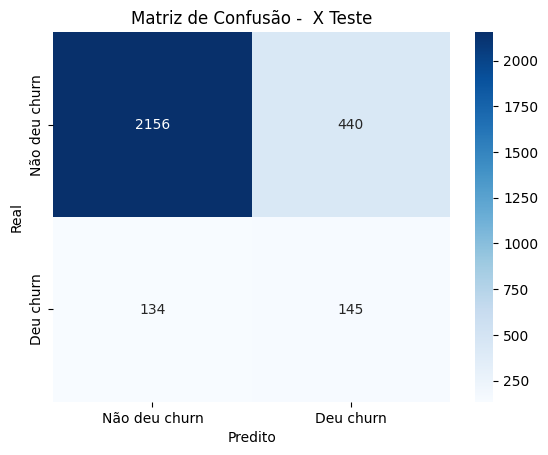

In [37]:
conf_matrix = confusion_matrix(y_test_original, y_pred_xgb_test_class)

# Plotar a matriz de confusão
labels = ['Não deu churn', 'Deu churn']

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão -  X Teste')
plt.xlabel('Predito')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.ylabel('Real')
plt.show()

### Modelo 2 - Random Forest

Para a tunagem de hiperparâmetros do modelo Random Forest, foi utilizado o GridSearch, uma ferramenta que seleciona os melhores valores (dentro de um intervalo pré-definido) para determinados hiperparâmetros e para um determinado modelo preditivo. Os hiperparâmetros selecionados para o Random Forest foram:

- **n_estimators (Número de Estimadores):** Especifica o número de árvores de decisão independentes que serão construídas no modelo Random Forest. Cada árvore contribui com uma votação para as previsões finais. Aumentar o número de estimadores geralmente melhora o desempenho do modelo, mas também aumenta o tempo de treinamento. No entanto, é importante evitar valores excessivamente altos para evitar o overfitting.

- **max_depth (Profundidade Máxima da Árvore):** Define a profundidade máxima permitida para cada árvore de decisão no Random Forest. Árvores mais profundas podem representar relações mais complexas nos dados, mas também aumentam o risco de overfitting. Um valor maior aumenta a complexidade do modelo, mas pode torná-lo mais propenso ao overfitting. Encontrar a profundidade adequada é importante para o ajuste de hiperparâmetros.

- **bootstrap (Amostragem com Substituição):** Este hiperparâmetro controla se a amostragem é realizada com ou sem substituição. Quando definido como True, cada árvore é treinada em uma amostra bootstrap aleatória dos dados de treinamento, o que introduz variação nas amostras. A amostragem com substituição ajuda a introduzir variação nos modelos individuais e melhora a generalização do Random Forest.

- **class_weight (Peso das Classes):** Este hiperparâmetro permite atribuir pesos diferentes às classes de destino no caso de um conjunto de dados desequilibrado. Os pesos ajudam a dar mais importância às classes minoritárias. Usar pesos de classe adequados é crucial em conjuntos de dados desequilibrados, pois ajuda o modelo a dar uma atenção adequada às classes minoritárias.

In [38]:
# param_dist = {
#     'n_estimators': np.random.randint(50, 1000, 100),  
#     'max_depth': np.random.randint(1, 100, 100), 
#     'bootstrap': [True, False],  
#     'class_weight': [None, 'balanced'],
# }

# # Inicialize o classificador Random Forest
# rf = RandomForestClassifier()

# # Crie um objeto RandomizedSearchCV
# random_search_rf = RandomizedSearchCV(
#     rf,
#     param_distributions=param_dist,
#     n_iter=5,  
#     scoring='roc_auc',  
#     cv=5, 
#     n_jobs=-1,
#     random_state=42
# )

# # Realize a pesquisa aleatória nos dados de treinamento
# random_search_rf.fit(X_train_resampled, y_train_resampled)

# # Exiba os melhores hiperparâmetros encontrados
# print("Melhores hiperparâmetros encontrados:")
# print(random_search_rf.best_params_)

In [39]:
# Inicializar o modelo com os melhores hiperparâmetros encontrados
random_forest_model = RandomForestClassifier(
    random_state=42,
    bootstrap=False, 
    class_weight='balanced',
    max_depth=60,
    n_estimators=120,
)

# Treinar o modelo
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Fazer previsões
y_pred_randomforest_train = random_forest_model.predict_proba(X_train_original)
y_pred_randomforest_test = random_forest_model.predict_proba(X_test_original)

In [40]:
threshold = 0.3
# Crie previsões binárias com base no limiar
y_pred_randomforest_train = np.where(y_pred_randomforest_train[:, 1] > threshold, 1, 0)
y_pred_randomforest_test = np.where(y_pred_randomforest_test[:, 1] > threshold, 1, 0)

In [41]:
# Avaliar o desempenho
accuracy_train = accuracy_score(y_train_original, y_pred_randomforest_train)
report_train = classification_report(y_train_original, y_pred_randomforest_train)

accuracy_test = accuracy_score(y_test_original, y_pred_randomforest_test)
report_test = classification_report(y_test_original, y_pred_randomforest_test)


print('Acurácia de treino:', accuracy_train)
print(report_train)

print('\n')

print('Acurácia de teste:', accuracy_test)
print(report_test)

auc_roc = roc_auc_score(y_test_original, y_pred_randomforest_test)
print(f'AUC-ROC Score: {auc_roc:.2f}')

Acurácia de treino: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10386
           1       1.00      1.00      1.00      1114

    accuracy                           1.00     11500
   macro avg       1.00      1.00      1.00     11500
weighted avg       1.00      1.00      1.00     11500



Acurácia de teste: 0.7853913043478261
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2596
           1       0.23      0.52      0.32       279

    accuracy                           0.79      2875
   macro avg       0.59      0.67      0.60      2875
weighted avg       0.87      0.79      0.82      2875

AUC-ROC Score: 0.67


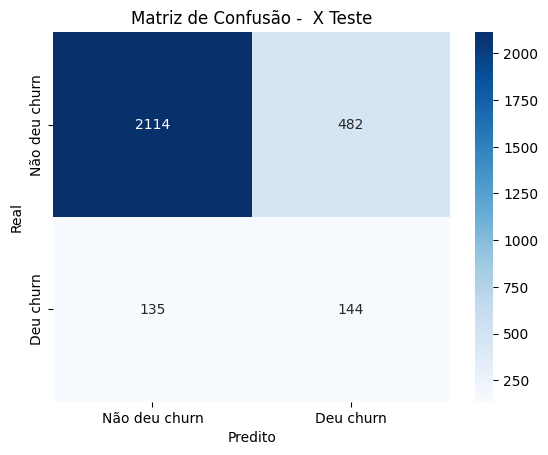

In [42]:
conf_matrix = confusion_matrix(y_test_original, y_pred_randomforest_test)

# Plotar a matriz de confusão
labels = ['Não deu churn', 'Deu churn']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão -  X Teste')
plt.xlabel('Predito')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.ylabel('Real')
plt.show()

### Modelo 3 - Support Vector Machine (SVM)

Para a tunagem de hiperparâmetros do modelo SVM, foi utilizado o GridSearch, uma ferramenta que seleciona os melhores valores (dentro de um intervalo pré-definido) para determinados hiperparâmetros e para um determinado modelo preditivo. Os hiperparâmetros selecionados para o SVM foram:

- **C (Parâmetro de Regularização):** Este hiperparâmetro controla a força da regularização. Um valor menor especifica uma regularização mais forte, o que significa que o modelo tentará ajustar os dados de treinamento o máximo possível. Um valor maior especifica uma regularização mais fraca, o que significa que o modelo tentará, além dos dados de treinamento, também aprender padrões mais complexos. É importante encontrar um equilíbrio.

- **kernel (Função Kernel):** Este hiperparâmetro especifica o tipo de função kernel a ser usado pelo modelo. O kernel é usado para mapear os dados para um espaço de maior dimensão, onde a separação se torna possível. O kernel linear é o mais simples e é usado quando as classes são linearmente separáveis. O kernel RBF é muito versátil e é usado quando as classes não são linearmente separáveis, tal qual o polinomial.

- **gamma (Coeficiente do Kernel):** Este hiperparâmetro é usado apenas para os kernels RBF e polinomial. Ele define o quão longe a influência de um único exemplo de treinamento alcança, com valores baixos significando 'longe' e valores altos significando 'perto'. Valores baixos significam que as instâncias de treinamento têm uma influência mais distante, o que significa que o hiperplano de decisão é mais suave. Valores altos significam que as instâncias de treinamento têm uma influência mais próxima, o que significa que o hiperplano de decisão é mais ajustado.

- **shrinking (Encolhimento):** Este hiperparâmetro controla se o modelo usará ou não a heurística de encolhimento. A heurística de encolhimento é uma técnica que acelera o treinamento do modelo, reduzindo o número de vetores de suporte. Isso pode melhorar o desempenho do modelo, mas também pode reduzir a precisão.

- **class_weight (Peso das Classes):** Este hiperparâmetro permite atribuir pesos diferentes às classes de destino no caso de um conjunto de dados desequilibrado. Os pesos ajudam a dar mais importância às classes minoritárias. Usar pesos de classe adequados é crucial em conjuntos de dados desequilibrados, pois ajuda o modelo a dar uma atenção adequada às classes com menor número de amostras.

- **probabilty (Probabilidade):** Este hiperparâmetro controla se o modelo deve ou não calcular probabilidades para as previsões. Isso pode ser útil para alguns algoritmos, como o SVM, que não são capazes de calcular probabilidades por padrão. No entanto, isso pode aumentar o tempo de treinamento. Desse modo, é possível analisar o churn através de um threshold.

In [43]:
# Inicializar o modelo SVM
model = SVC(
    C = 0.1,
    kernel= 'rbf',
    gamma= 'scale',
    shrinking= True,
    class_weight= 'balanced',
    probability=True,
)

# Treinar o modelo
model.fit(X_train_resampled, y_train_resampled)

SVC(C=0.1, class_weight='balanced', probability=True)

In [44]:
# Fazer previsões 
y_pred_svmrbf_train = model.predict_proba(X_train_original)
y_pred_svmrbf_test = model.predict_proba(X_test_original)

In [45]:
threshold = 0.125

# Crie previsões binárias com base no limiar
y_pred_svm_train_class = np.where(y_pred_xgb_train[:, 1] > threshold, 1, 0)
y_pred_svm_test_class = np.where(y_pred_xgb_test[:, 1] > threshold, 1, 0)

In [46]:
# Avaliar o desempenho
accuracy_train = accuracy_score(y_train_original, y_pred_svm_train_class)
report_train = classification_report(y_train_original, y_pred_svm_train_class)

accuracy_test = accuracy_score(y_test_original, y_pred_svm_test_class)
report_test = classification_report(y_test_original, y_pred_svm_test_class)


print('Acurácia de treino:', accuracy_train)
print(report_train)

print('\n')

print('Acurácia de teste:', accuracy_test)
print(report_test)

auc_roc = roc_auc_score(y_test_original, y_pred_svm_test_class)
print(f'AUC-ROC Score: {auc_roc:.2f}')

Acurácia de treino: 0.9953913043478261
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10386
           1       0.95      1.00      0.98      1114

    accuracy                           1.00     11500
   macro avg       0.98      1.00      0.99     11500
weighted avg       1.00      1.00      1.00     11500



Acurácia de teste: 0.782608695652174
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2596
           1       0.24      0.56      0.33       279

    accuracy                           0.78      2875
   macro avg       0.59      0.68      0.60      2875
weighted avg       0.88      0.78      0.82      2875

AUC-ROC Score: 0.68


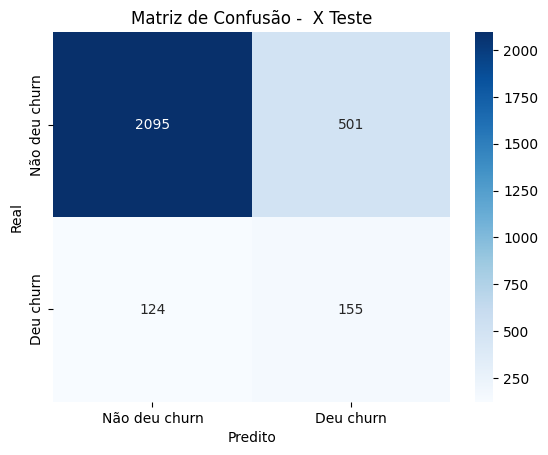

In [47]:
conf_matrix = confusion_matrix(y_test_original, y_pred_svm_test_class)

# Plotar a matriz de confusão
labels = ['Não deu churn', 'Deu churn']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão -  X Teste')
plt.xlabel('Predito')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.ylabel('Real')
plt.show()

## Análise e Recomendação de Desconto

In [57]:
arquivo_dataset = normalized_df.copy()
dataset_pred = pca.transform(arquivo_dataset)
dataset_pred = pd.DataFrame(dataset_pred)

prob_churn = xgb_model.predict_proba( dataset_pred )

In [58]:
class listagem_descontos(BaseEstimator, TransformerMixin):
    def transform ( y_proba, X_test):
        novo_X = []
        #itera o numero de valores preditos
        for i in range(len(y_proba)):
            #verifica se a probabilidade de churn é maior que 0.125
            if y_proba[i][1] > 0.125:
                #itera o numero de descontos possiveis
                for j in range(15):
                    temp = X_test.iloc[i].copy()
                    #modifica todas as variáveis de preços aplicando os descontos
                    #o calculo correto seria através da relação 12*net_margin = consumo*(price_p1_var + price_p2_var + price_p3_var)/3 - custo. mas essa relação nao funciona nessa base de dados por conta da incoerencia dos valores de consumo, preço e net_margin
                    temp['price_p1_fix'] = temp['price_p1_fix'] * ((100 - (j * 5))/100)
                    temp['price_p2_fix'] = temp['price_p2_fix'] * ((100 - (j * 5))/100)
                    temp['price_p3_fix'] = temp['price_p3_fix'] * ((100 - (j * 5))/100)
                    temp['price_p1_var'] = temp['price_p1_var'] * ((100 - (j * 5))/100)
                    temp['price_p2_var'] = temp['price_p2_var'] * ((100 - (j * 5))/100)
                    temp['price_p3_var'] = temp['price_p3_var'] * ((100 - (j * 5))/100)
                    temp['net_margin'] = temp['net_margin'] * ((100 - (j * 5))/100)
                    temp['margin_gross_pow_ele'] = temp['margin_gross_pow_ele'] * ((100 - (j * 5))/100)
                    temp['margin_net_pow_ele'] = temp['margin_net_pow_ele'] * ((100 - (j * 5))/100)
                    novo_X.append(temp)
        novo_X_df = pd.DataFrame(novo_X)           
        return novo_X_df

In [59]:
class EV_descontos (BaseEstimator, TransformerMixin):
    #calcula o melhor ev baseado nos resultados das probabilidades de churn dos dados com descontos aplicados
    def transform ( y_proba, X_test):
        X_test = pd.DataFrame(X_test)
        melhor_desconto = 0
        melhor_valor = 0
        melhores_descontos = []
        melhores_valores = []
        multiplicador_desconto = 0
        valores_originais = []
        lista_EV = []
        #itera a quantidade de valores preditos
        for i in range(len(y_proba)):
            temp = X_test.iloc[i].copy()
            #calcula o valor gerado a partir do desconto aplicado
            valor = y_proba[i][0] *  temp['net_margin']
            print('valor', valor)
            #checa se o novo valor é maior que o melhor valor, se for, salva o desconto e o valor
            if valor > melhor_valor:
                melhor_desconto = multiplicador_desconto * 5
                melhor_valor = valor.copy()
            if multiplicador_desconto == 0:
                valor_original = y_proba[i][0] * temp['net_margin']
                valores_originais.append(valor_original)
                print('valor original', valor_original)
            #a cada 15 descontos testados reseta a variavel multiplicador_desconto e salva o melhor desconto e o melhor valor, dando continuidade com os descontos dos clientes seguintes
            if multiplicador_desconto == 14:
                melhores_descontos.append(melhor_desconto)
                print('melhor desconto', melhor_desconto )
                melhores_valores.append(melhor_valor)
                print('melhor valor', melhor_valor)
                print('EV', melhor_valor - valor_original)
                lista_EV.append(melhor_valor - valor_original)
                multiplicador_desconto = -1
                melhor_valor = 0
            multiplicador_desconto += 1
        #retorna a lista com o melhor desconto e o melhor valor pra cada cliente
        return melhores_descontos, valores_originais, melhores_valores,lista_EV

In [60]:
holder_df = processing_df.copy()
#display(listagem_descontos.transform(prob_churn, processing_df))
display(holder_df)

# Selecione as colunas categóricas
categorical_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'origin_up', 'channel_sales']

# Separar a coluna categórica 'channel_sales' em múltiplas colunas usando OneHot Encoding
for col in categorical_cols:
    holder_df = pd.get_dummies(holder_df, columns=[col], prefix=col, dtype=int)

print(holder_df)

possiveis_descontos_df = listagem_descontos.transform(prob_churn, holder_df)
descontos_listados = possiveis_descontos_df.copy()
print(possiveis_descontos_df)

numeric_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']

possiveis_descontos_df[numeric_cols] = scaler.transform(possiveis_descontos_df[numeric_cols])

# Dropar id
possiveis_descontos_df.drop('id', axis=1, inplace=True)
#Dropar coluna 'churn'
possiveis_descontos_df.drop('churn', axis=1)
possiveis_descontos_df = pca.transform(possiveis_descontos_df)

id                     channel_sales  \
2      d29c2c54acc38ff3c0614d0a653813dd                               NaN   
3      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
4      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
6      149d57cf92fc41cf94415803a877cb4b                               NaN   
7      1aa498825382410b098937d65c4ec26d  usilxuppasemubllopkaafesmlibmsdf   
...                                 ...                               ...   
16089  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
16090  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
16091  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
16092  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
16093  563dde550fd624d7352f3de77c0cdfcd                               NaN   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
2          4660             0                0  21/08/2015  30/08/2022   
3           544             0                0  16/04/2016  16/04/2022   
4          1584             0                0  30/03/2016  30/03/2022   
6          4425             0              526  13/01/2016  07/03/2022   
7          8302             0             1998  09/12/2017  09/12/2022   
...         ...           ...              ...         ...         ...   
16089     32270         47940                0  24/05/2018  08/05/2022   
16090      7223             0              181  27/08/2018  27/08/2022   
16091      1844             0              179  08/02/2018  07/02/2022   
16092       131             0                0  30/08/2018  30/08/2022   
16093      8730             0                0  18/12/2015  17/12/2022   

      date_modif_prod date_renewal  forecast_base_bill_ele  \
2          21/08/2015   31/08/2021               51.230532   
3          16/04/2016   17/04/2021               51.230532   
4          30/03/2016   31/03/2021               51.230532   
6          13/01/2016   09/03/2021              123.393755   
7          01/11/2021   10/12/2021              290.100000   
...               ...          ...                     ...   
16089      08/05/2021   26/05/2020               51.230532   
16090      27/08/2018   28/08/2021               68.640000   
16091      08/02/2018   09/02/2021               76.126292   
16092      30/08/2018   31/08/2021               51.230532   
16093      18/12/2015   21/12/2021               51.230532   

       forecast_base_bill_year  forecast_bill_12m  forecast_cons_12m  \
2                    51.230532        2010.401038             189.95   
3                    51.230532        2010.401038              47.96   
4                    51.230532        2010.401038             240.04   
6                   123.393755        2476.094996             445.75   
7                   290.100000        1412.540000             796.94   
...                        ...                ...                ...   
16089                51.230532        2010.401038            4648.01   
16090                68.640000        1254.650000             631.69   
16091                76.126292        2171.061893             190.39   
16092                51.230532        2010.401038              19.34   
16093                51.230532        2010.401038             762.41   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
2                       0                       0.0                    16.27   
3                       0                       0.0                    38.72   
4                       0                       0.0                    19.83   
6                     526                       0.0                   131.73   
7                    1998                       0.0                    30.12   
...                   ...                       ...                      ...   
16089                   0                       0.0  

                                     id  cons_12m  cons_gas_12m  \
2      d29c2c54acc38ff3c0614d0a653813dd      4660             0   
3      764c75f661154dac3a6c254cd082ea7d       544             0   
4      bba03439a292a1e166f80264c16191cb      1584             0   
6      149d57cf92fc41cf94415803a877cb4b      4425             0   
7      1aa498825382410b098937d65c4ec26d      8302             0   
...                                 ...       ...           ...   
16089  18463073fb097fc0ac5d3e040f356987     32270         47940   
16090  d0a6f71671571ed83b2645d23af6de00      7223             0   
16091  10e6828ddd62cbcf687cb74928c4c2d2      1844             0   
16092  1cf20fd6206d7678d5bcafd28c53b4db       131             0   
16093  563dde550fd624d7352f3de77c0cdfcd      8730             0   

       cons_last_month  forecast_base_bill_ele  forecast_base_bill_year  \
2                    0               51.230532                51.230532   
3                    0               51.23053

In [61]:
#calcula novas probabilidades de churn com os descontos aplicados
prob_churn_descontos = xgb_model.predict_proba(possiveis_descontos_df )
print('prob',prob_churn_descontos[:100])
#calcula o melhor desconto, e o EV
melhores_descontos, valores_originais, melhores_valores,lista_EV = EV_descontos.transform(prob_churn_descontos, descontos_listados)

prob [[3.8799047e-03 9.9612010e-01]
 [1.6355193e-01 8.3644807e-01]
 [2.4315804e-01 7.5684196e-01]
 [8.5753906e-01 1.4246097e-01]
 [9.4131297e-01 5.8687046e-02]
 [9.7877276e-01 2.1227242e-02]
 [9.9955416e-01 4.4581489e-04]
 [9.9949962e-01 5.0036900e-04]
 [9.9987793e-01 1.2206723e-04]
 [9.9992013e-01 7.9886791e-05]
 [9.9994296e-01 5.7045923e-05]
 [9.9990624e-01 9.3771108e-05]
 [9.9993908e-01 6.0921528e-05]
 [9.9995154e-01 4.8463025e-05]
 [9.9995607e-01 4.3912652e-05]
 [1.9455820e-01 8.0544180e-01]
 [8.3062887e-01 1.6937113e-01]
 [9.8178875e-01 1.8211255e-02]
 [9.8903632e-01 1.0963707e-02]
 [9.9421751e-01 5.7825078e-03]
 [9.9321395e-01 6.7860675e-03]
 [9.9562913e-01 4.3708817e-03]
 [9.9833667e-01 1.6633113e-03]
 [9.9827683e-01 1.7231519e-03]
 [9.9844396e-01 1.5560337e-03]
 [9.9968266e-01 3.1736231e-04]
 [9.9988151e-01 1.1846717e-04]
 [9.9995828e-01 4.1719020e-05]
 [9.9995738e-01 4.2629537e-05]
 [9.9996883e-01 3.1189415e-05]
 [2.3846507e-02 9.7615349e-01]
 [6.1951971e-01 3.8048026e-01]
 [7

In [62]:
#calcula e printa os resultados finais
soma_lucro = 0
soma_multiplicador_aumento = 0
for i in range(len(lista_EV)):
    print(lista_EV[i])
    print(valores_originais[i])
    soma_lucro += lista_EV[i]
    if valores_originais[i] != 0:
        soma_multiplicador_aumento += lista_EV[i]/valores_originais[i]
j = i

print('Aumento de lucro total por ano:', soma_lucro, '$')
print('Aumento de lucro médio por cliente por ano:', soma_lucro/j, '$')
print('Porcentagem de aumento de lucro médio por cliente:', soma_multiplicador_aumento/j, '%')

89.06887720656395
0.461281875371933
68.96718223047257
19.473330560326577
27.887419947981837
0.9242906141281128
504.6177406163514
3.73658529818058
148.1212034471035
26.12732248425484
123.62574381792545
0.22765451610088347
2.399858355760575
13.124012936353683
322.1857650225162
20.453162212371826
32.61700792104006
17.161402351856232
92.1814908901453
2.3873270440101626
92.4061434571147
385.07873867630957
280.707538169384
6.569494411945343
1.959511244773865
0.02035643756389618
36.7667746168375
22.645377002358437
2.893991902828217
0.02273428916931152
23.191700675487517
0.21906278133392335
3.6049485631585014
192.01355952739715
50.709270550310606
1.9672854244709015
51.723014456391326
31.39486936569214
64.30188971304894
1.0777037131786347
28.632123300075527
13.701807646751403
226.47572087091206
6.763454310894012
98.97549210476876
150.35182951927186
59.465510482728476
0.9631298714876174
8.258158297240733
0.237487855553627
134.95993820905684
0.9272451400756836
5.017233205378055
23.871204909086227